In [60]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rc_file_defaults()

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

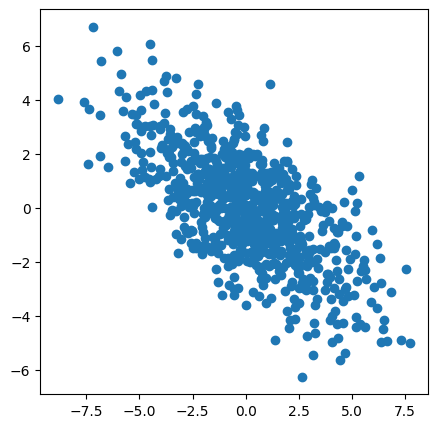

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

cov = np.array([[6, -3], [-3, 3.5]])
pts = np.random.multivariate_normal([0, 0], cov, size=800)

plt.scatter(*pts.T)

(-0.5, 4.0)

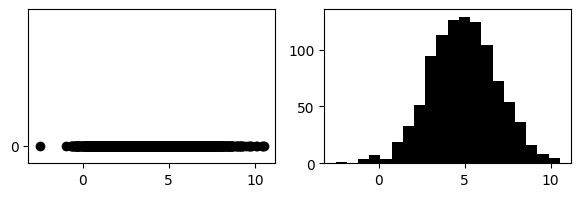

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3 * 2 + 1, 2))

ax = ax1
size = 1000
x = 2 * np.random.randn(size) + 5
y = np.linspace(0, 1, size) * 0
ax1.scatter(x, y, color="k")
ax2.hist(x, color="k", bins=20)

x = 1 * np.random.randn(size) + 2
ax.scatter(x, y, color="k")

ax.set_yticks([0])
ax.set_ylim(-0.5, 4)

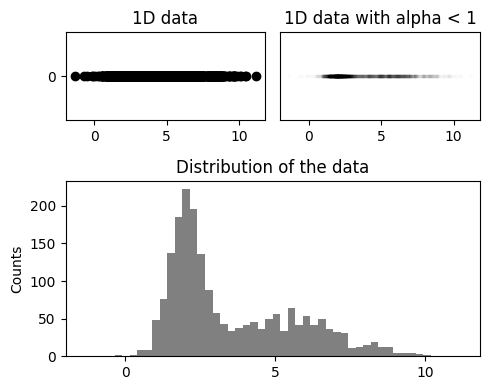

In [75]:
import matplotlib.gridspec as gridspec

# Create a figure object
fig = plt.figure(figsize=(5, 4))

# Define the grid
grid = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[0.5, 1])

# Create first subplot top-left
ax1 = plt.subplot(grid[0])

# Create second subplot, on the top-right
ax2 = plt.subplot(grid[1])

# Create third subplot, at the bottom across full width
ax3 = plt.subplot(grid[2:])

np.random.seed(43)
size = 1000
y = np.linspace(0, 1, size * 2) * 0
x1, x2 = np.random.randn(size) / 2 + 2, 2 * np.random.randn(size) + 5
x = np.concatenate((x1, x2), axis=0)
ax1.scatter(x, y, color="k")
ax2.scatter(x, y, color="k", alpha=0.01, s=5)

ax3.hist(x, color="gray", bins=50)
ax3.set_xticks([0, 5, 10])

ax1.set_yticks([0])
ax1.set_title("1D data")
ax2.set_title("1D data with alpha < 1")
ax3.set_title("Distribution of the data")

ax2.set_yticks([])
ax3.set_ylabel("Counts")

# Show the plot
plt.tight_layout()
plt.savefig(figures_path / "1d_histograms_theory.png", bbox_inches="tight", dpi=300)
plt.show()